<a href="https://colab.research.google.com/github/younglaecho/learn_machine_learning/blob/main/%08chap03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 선형회귀

In [3]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

k- 최근접 이웃 회귀는 농어의 길이가 50cm 이면, 무게를 1033g으로 예측한다.

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


모델의 결과를 그래프로 보았을 때, 상승곡선의 경향성과 매우 동떨어져 있다는 것을 확인할 수 있습니다.<br>
그 이유는 길이가 해당 훈련데이터의 최대길이보다 길어지면, 가장 길이가 긴 3개의 데이터만 예측에 활용하기 때문입니다.<br>
심지어 길이를 100cm로 입력해도 결과는 1033으로 올바르지 않은 값이 나옵니다.

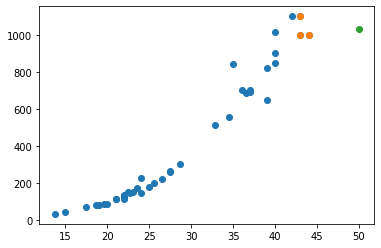

In [5]:
import matplotlib.pyplot as plt 
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes])
plt.scatter(50, 1033)

### 위의 문제를 해결하기 위해 선형회귀를 사용할 수 있습니다!

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


선형 회귀를 사용하면 
$$ y = ax + b $$
의 형태로 fitting 됩니다.
a와 b는 lr 객체의 coef_와 intercept_ 속성에 각각 저장됩니다.<br>
이를 모델 파라미터라고 부르며 모델 파라미터를 찾아가면 훈련하는 방법을 **모델 기반 학습**이라고 부릅니다.<br>
전 장에 나왔던 K-최근접 이웃에는 모델 파라미터가 없고, 훈련세트를 저장하는 것이 전부였습니다.<br>
이를 **사례 기반 학습**이라 부릅니다.

In [7]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


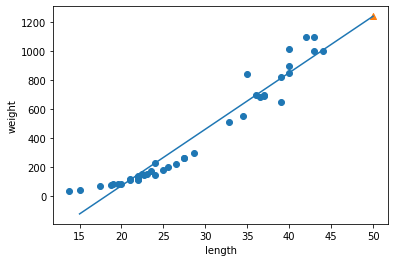

In [8]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


훈련셋의 점수가 테스트 셋의 점수보다 높지만, 훈련셋의 점수도 낮기 때문에 과대적합이라고 보기 힘듭니다.<br> 오히려 과소 적합에 가깝다고 볼 수 있습니다.<br>
그래프와 모델이 예측한 구간을 비교해 보았을 때, 완전히 맞는다고 보기 힘든 상태입니다.



## 다항회귀
위의 문제를 해결하기 위해서는, 직선으로 된 모델이 아니라 최적의 곡선을 찾는 것이 좋을 것입니다. <br>
이 때, 사용할 수 있는 것이 다항회귀입니다.<br>
이 경우에는 2차 방정식으로 해결해보겠습니다.

In [10]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


인풋데이터를 제곱하여 2차 항을 구현하였고, np.column_stack으로 연결했습니다.<br>
다음으로는 거기에 선형회귀 모델을 사용하였습니다.<Br>
여기서 다항회귀를 하면 선형이 아닐텐데 어째서 선형회귀를 사용하는가? 하는 의문이 생길 수 있습니다. <br>
하지만 특성의 값을 제곱한 것을 새로운 하나의 특성이라고 생각한다면 즉, x^2 = y라 치환하면,
$$ z=ax^2+bx+c =>z = ay+bx+c$$
이기 때문에 선형관계로 표현할 수 있습니다!

In [14]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [19]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


두 개의 특성을 사용한 선형모델이기 때문에 모델 파라미터는 총 세개 나옵니다.

아래에 2차 다항회귀 모델의 그래프를 그려보겠습니다.

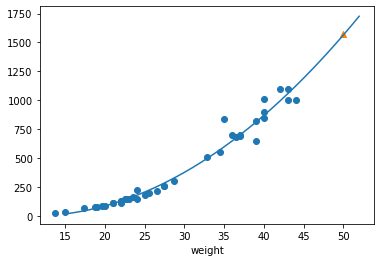

In [25]:
point = np.arange(15, 53)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.55*point + 116.05)
plt.scatter(50, 1574, marker ='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

In [28]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
